# Importing libraries and modules

In [71]:
from bs4 import BeautifulSoup
import pandas
import requests

In [58]:
url = "https://naruto.fandom.com/wiki/List_of_video_games"
response = requests.get(url)
doc = BeautifulSoup(response.text, 'html.parser')
print(doc.prettify())

<!DOCTYPE html>
<html class="client-nojs sse-other l2u-other odyssey-noads" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of video games | Narutopedia | Fandom
  </title>
  <script>
   document.documentElement.className="client-js sse-other l2u-other odyssey-noads";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1e5b3e8d873e521d4b61e9df1d93fad9","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_video_games","wgTitle":"List of video games","wgCurRevisionId":1453563,"wgRevisionId":1453563,"wgArticleId":2365,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Media"],"wgPageViewLanguage":"en","wgPageContentLanguage":"en","wgPage

# Get all the Game Consoles

In [78]:
consoles = doc.find_all('span', class_='mw-headline')
consoles

[<span class="mw-headline" id="Data_Carddass">Data Carddass</span>,
 <span class="mw-headline" id="WonderSwan_Colour">WonderSwan Colour</span>,
 <span class="mw-headline" id="Nintendo_Game_Boy_Advance">Nintendo Game Boy Advance</span>,
 <span class="mw-headline" id="Nintendo_DS">Nintendo DS</span>,
 <span class="mw-headline" id="Nintendo_3DS">Nintendo 3DS</span>,
 <span class="mw-headline" id="Nintendo_GameCube">Nintendo GameCube</span>,
 <span class="mw-headline" id="Nintendo_Wii">Nintendo Wii</span>,
 <span class="mw-headline" id="Nintendo_Switch">Nintendo Switch</span>,
 <span class="mw-headline" id="Sony_PlayStation">Sony PlayStation</span>,
 <span class="mw-headline" id="Sony_PlayStation_2">Sony PlayStation 2</span>,
 <span class="mw-headline" id="Sony_PlayStation_Portable">Sony PlayStation Portable</span>,
 <span class="mw-headline" id="Sony_PlayStation_3">Sony PlayStation 3</span>,
 <span class="mw-headline" id="Sony_PlayStation_4">Sony PlayStation 4</span>,
 <span class="mw-hea

# Testing - Finding the second table
We accessed the second element because the first table is empty

In [60]:
wonderswan_console = consoles[1]
h2_parent = wonderswan_console.parent  # Go up to the h2
table = h2_parent.find_next_sibling('table') 
table

<table class="sortable wikitable smwtable"><tbody><tr><th class="English-name">English name</th><th class="Kanji-name"><a href="/wiki/Property:Kanji_name" title="Property:Kanji name">Kanji name</a></th><th class="Romaji-name"><a href="/wiki/Property:Romaji_name" title="Property:Romaji name">Romaji name</a></th><th class="Japanese-release"><a href="/wiki/Property:Japanese_release" title="Property:Japanese release">Japanese release</a></th><th class="English-release"><a href="/wiki/Property:English_release" title="Property:English release">English release</a></th></tr><tr class="row-odd" data-row-number="1"><td class="English-name smwtype_wpg"><a href="/wiki/Naruto:_Konoha_Ninp%C5%8Dch%C5%8D" title="Naruto: Konoha Ninpōchō">Naruto: Konoha Ninpōchō</a></td><td class="Kanji-name smwtype_txt">ナルト-木ノ葉忍法帖</td><td class="Romaji-name smwtype_txt">Naruto: Konoha Ninpōchō</td><td class="Japanese-release smwtype_dat" data-sort-value="2452725.5">27 March 2003</td><td class="English-release smwtype_

In [62]:
game_cells = table.find_all('td')
# game_cells[0].text
game_cells

[<td class="English-name smwtype_wpg"><a href="/wiki/Naruto:_Konoha_Ninp%C5%8Dch%C5%8D" title="Naruto: Konoha Ninpōchō">Naruto: Konoha Ninpōchō</a></td>,
 <td class="Kanji-name smwtype_txt">ナルト-木ノ葉忍法帖</td>,
 <td class="Romaji-name smwtype_txt">Naruto: Konoha Ninpōchō</td>,
 <td class="Japanese-release smwtype_dat" data-sort-value="2452725.5">27 March 2003</td>,
 <td class="English-release smwtype_dat"></td>]

In [63]:
game_cells[0].text

'Naruto: Konoha Ninpōchō'

In [64]:
for game in game_cells:
    print(game.get_text())  # This should print all cell contents

Naruto: Konoha Ninpōchō
ナルト-木ノ葉忍法帖
Naruto: Konoha Ninpōchō
27 March 2003



In [65]:
english_cells = table.find_all('td', class_='English-name')
english_cells

[<td class="English-name smwtype_wpg"><a href="/wiki/Naruto:_Konoha_Ninp%C5%8Dch%C5%8D" title="Naruto: Konoha Ninpōchō">Naruto: Konoha Ninpōchō</a></td>]

In [66]:
english_games = []
for i in range(0, len(game_cells), 5):  # Start at 0, step by 5
    english_name = game_cells[i].get_text()
    english_games.append(english_name)
english_games

['Naruto: Konoha Ninpōchō']

In [67]:
english_cells = table.find_all('td', class_='English-name')
english_cells[0].text

'Naruto: Konoha Ninpōchō'

## Automating the process - Go into 

In [ ]:
# Create console_games dictionary

console_games = {}  

for console in consoles:
    console_name = console.get_text()
    h2_parent = console.parent
    next_element = h2_parent.next_sibling
    
    while next_element and next_element.name != 'table' and next_element.name != 'h2':
        next_element = next_element.next_sibling
    
    if next_element and next_element.name == 'table':
        table = next_element
        print(f"\n{console_name}:")
        
        # Extract games (the code you already tested)
        game_cells = table.find_all('td')
        english_games = []
        
        for i in range(0, len(game_cells), 5):
            english_name = game_cells[i].get_text().strip()
            english_games.append(english_name)
            print(f"  - {english_name}")
        
        console_games[console_name] = english_games
    else:
        console_games[console_name] = []
        print(f"{console_name}: No games")

In [69]:
# Test specifically with Data Carddass
data_carddass = consoles[0]
h2_parent = data_carddass.parent
table = h2_parent.find_next_sibling('table')

if table:
    print("Found a table - but which one?")
    # Let's see what's right before this table
    prev_h2 = table.find_previous('h2')
    prev_console = prev_h2.find('span', class_='mw-headline')
    print(f"This table actually belongs to: {prev_console.get_text()}")

Found a table - but which one?
This table actually belongs to: WonderSwan Colour


# Will also automate Miscellanous platforms soon!

In [79]:
for console in consoles:
    console_name = console.get_text()
    h2_parent = console.parent
    
    # Find the very next sibling element (whatever it is)
    next_element = h2_parent.next_sibling
    
    # Keep looking until you find either a table or another h2
    while next_element and next_element.name != 'table' and next_element.name != 'h2':
        next_element = next_element.next_sibling
    
    # Now check what you found
    if next_element and next_element.name == 'table':
        # Found a table directly - this console has games
        table = next_element
        # ... extract games ...
    else:
        # Found an h2 or nothing - this console has no games
        console_games[console_name] = []
        print(f"{console_name}: No games")

Data Carddass: No games
Online Games: No games
Arcade: No games
Handheld LCD: No games
Mobile Operating Systems: No games
Collaborations with Other Games: No games
See Also: No games
External Links: No games
References: No games


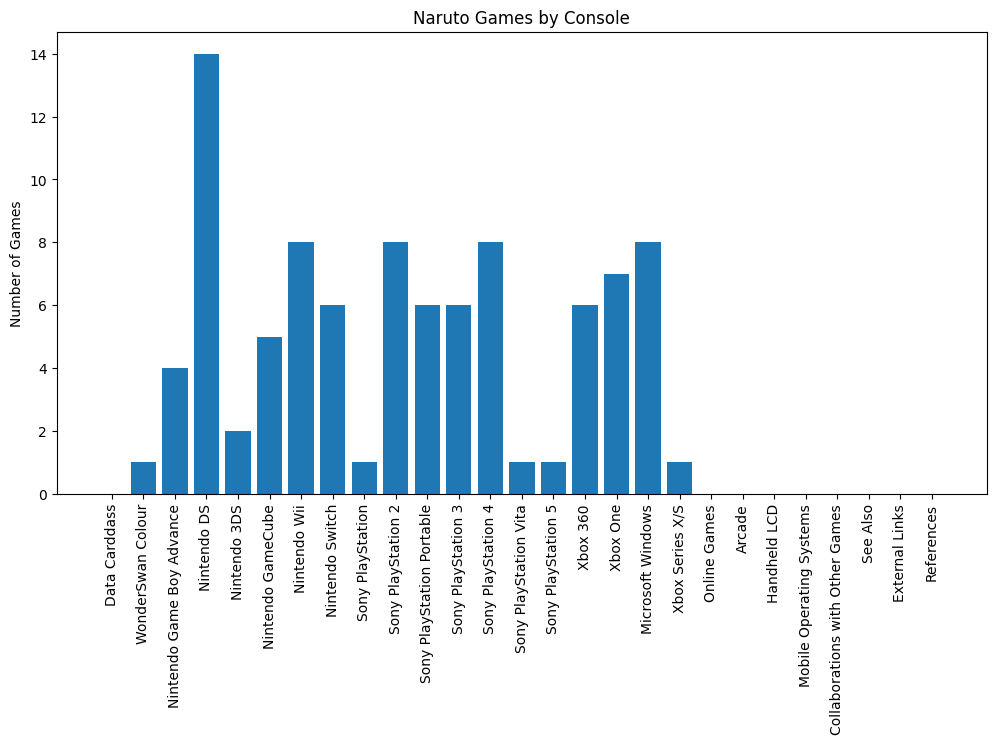

In [76]:
import matplotlib.pyplot as plt

# Extract console names and game counts
console_names = list(console_games.keys())
game_counts = [len(games) for games in console_games.values()]

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(console_names, game_counts)
plt.xticks(rotation=90)  # Rotate labels so they don't overlap
plt.ylabel('Number of Games')
plt.title('Naruto Games by Console')
# plt.tight_layout()
plt.show()

In [77]:
# Only plot consoles that actually have games
consoles_with_games = {k: v for k, v in console_games.items() if len(v) > 0}